In [ ]:
!sudo apt install tesseract-ocr
!pip install pytesseract
!pip3 install torch torchvision torchaudio
!pip install transformers
!pip install sentence-transformers
!pip install xlwt

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 3 newly installed, 0 to remove and 24 not upgraded.
Need to get 4,850 kB of archives.
After this operation, 16.3 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu focal/universe amd64 tesseract-ocr-eng all 1:4.00~git30-7274cfa-1 [1,598 kB]
Get:2 http://archive.ubuntu.com/ubuntu focal/universe amd64 tesseract-ocr-osd all 1:4.00~git30-7274cfa-1 [2,990 kB]
Get:3 http://archive.ubuntu.com/ubuntu focal/universe amd64 tesseract-ocr amd64 4.1.1-2build2 [262 kB]
Fetched 4,850 kB in 1s (4,827 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/Fro

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
from sentence_transformers import SentenceTransformer, util
import numpy as np
import pytesseract
import shutil
import os
import random
import xlwt
import PIL
from xlwt import Workbook
model = SentenceTransformer('stsb-mpnet-base-v2')

Mounted at /content/drive


In [ ]:
dir_path = '/content/drive/MyDrive/NLP/Handwritten Answers'
res = []
for path in os.listdir(dir_path):
    if os.path.isfile(os.path.join(dir_path, path)):
        res.append(path)
print(res)

['image_1.jpg', 'image_2.jpg', 'image_3.jpg']


In [ ]:
def write_in_file(text,filename):
  txt_file=filename+'_converted.txt'
  file_dir='/content/drive/MyDrive/NLP/Converted Answers' + '/'+txt_file
  f = open(file_dir, "w")
  f.write(text)
  f.close()
  return

In [ ]:
for filename in res:
  img = PIL.Image.open(dir_path + '/' + filename)
  text_data = pytesseract.image_to_string(img.convert('RGB'), lang='eng').replace('\n',' ')
  files = filename[:-4]
  write_in_file(text_data,files)
  print( files + " : " + text_data)

image_1 :    NLP stands for Natural Language Processing, which is a subfield of artificial     intelligence that focuses on the interaction between computers and human language     NLP involves using computational methods to analyze, understand, and generate     natural language text or speech.NLP stands for Natural Language Processing, which     is a subfield of artificial intelligence that focuses on the interaction between     computers and human language. NLP involves using computational methods to     analyze, understand, and generate natural language text or speech.                                                                                     
image_2 :    NLP algorithms and techniques can be used to perform a wide range of tasks,     including sentiment analysis, text classification, language translation, speech     recognition, and question answering. NLP relies on machine learning algorithms and     statistical models to process and analyze natural language data.       

In [ ]:
ta_path = '/content/drive/MyDrive/NLP/Final Answers'
res_ta = []
for path in os.listdir(ta_path):
    if os.path.isfile(os.path.join(ta_path, path)):
        res_ta.append(path)
print(res_ta)

['image_1.txt', 'image_2.txt', 'image_3.txt']


In [ ]:
st_path = '/content/drive/MyDrive/NLP/Converted Answers'
res_st = []
for path in os.listdir(st_path):
    if os.path.isfile(os.path.join(st_path, path)):
        res_st.append(path)
res_st.sort()
print(res_st)

['image_1_converted.txt', 'image_2_converted.txt', 'image_3_converted.txt']


In [ ]:
def generate_scores(teacher,student):
  embedding1 = model.encode(teacher, convert_to_tensor=True)
  embedding2 = model.encode(student, convert_to_tensor=True)
  cosine_scores = util.pytorch_cos_sim(embedding1, embedding2)
  print("Teacher_Answer :", teacher)
  print("Student_Answer :", student)
  print("Similarity score:", cosine_scores.item())
  return cosine_scores.item()

In [ ]:
score = []
for i in range(len(res_ta)):
  file1 = open("/content/drive/MyDrive/NLP/Converted Answers/"+res_st[i],"r+")
  file2 = open("/content/drive/MyDrive/NLP/Final Answers/"+res_ta[i],"r+")
  score.append(generate_scores(file2.readline(),file1.readline()))
score

Teacher_Answer : NLP stands for Natural Language Processing, which is a subfield of artificial intelligence that focuses on the interaction between computers and human language. NLP involves using computational methods to analyze, understand, and generate natural language text or speech.
Student_Answer :    NLP stands for Natural Language Processing, which is a subfield of artificial     intelligence that focuses on the interaction between computers and human language     NLP involves using computational methods to analyze, understand, and generate     natural language text or speech.NLP stands for Natural Language Processing, which     is a subfield of artificial intelligence that focuses on the interaction between     computers and human language. NLP involves using computational methods to     analyze, understand, and generate natural language text or speech.                                                                                     
Similarity score: 0.9812994003295898
Te

[0.9812994003295898, 1.0, 0.9999999403953552]

In [ ]:
weightage = [5, 3, 2]

In [ ]:
wb = Workbook()
sheet1 = wb.add_sheet('Student1')
sheet1.write(0, 0, 'S_NO')
sheet1.write(0, 1, 'Question_number')
sheet1.write(0, 2, 'Weightage')
sheet1.write(0, 3, 'Similarity_score')
sheet1.write(0, 4, 'Marks_obtained')
for i in range(1,len(res_ta)+1):
  sheet1.write(i, 0, i)
  sheet1.write(i, 1, res[i-1][:-4])
  sheet1.write(i, 2, weightage[i-1])
  sheet1.write(i, 3, score[i-1])
  sheet1.write(i, 4, (weightage[i-1]*score[i-1]) )
wb.save('/content/drive/MyDrive/NLP/scores.xls')

In [ ]:
Total_Score = 0
for i in range(len(score)):
  Total_Score = Total_Score + (weightage[i]*score[i])

In [ ]:
print(Total_Score)

9.90649688243866


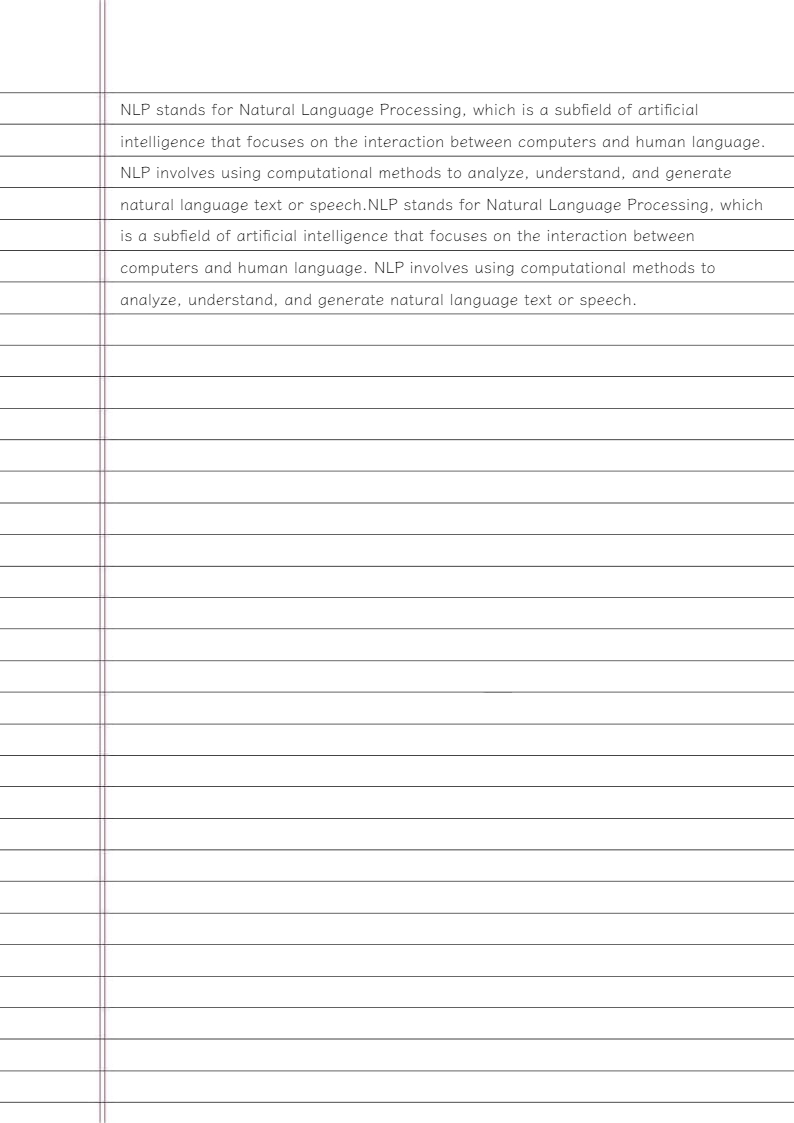

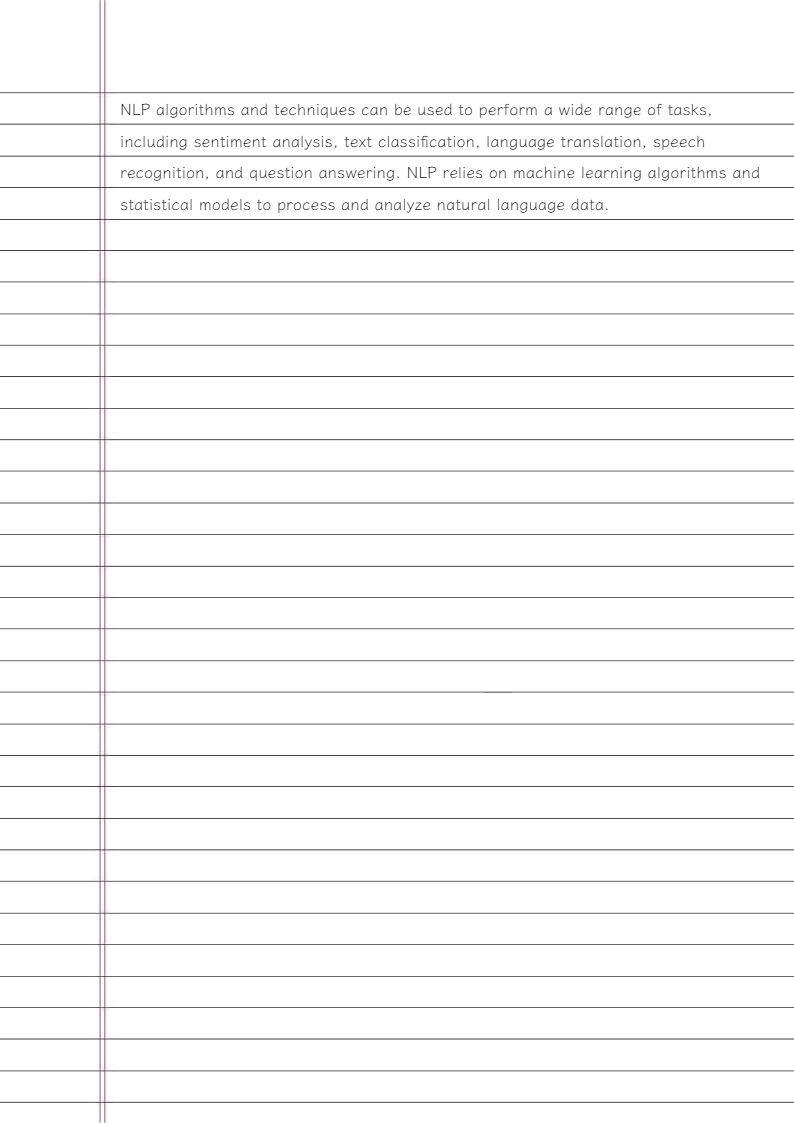

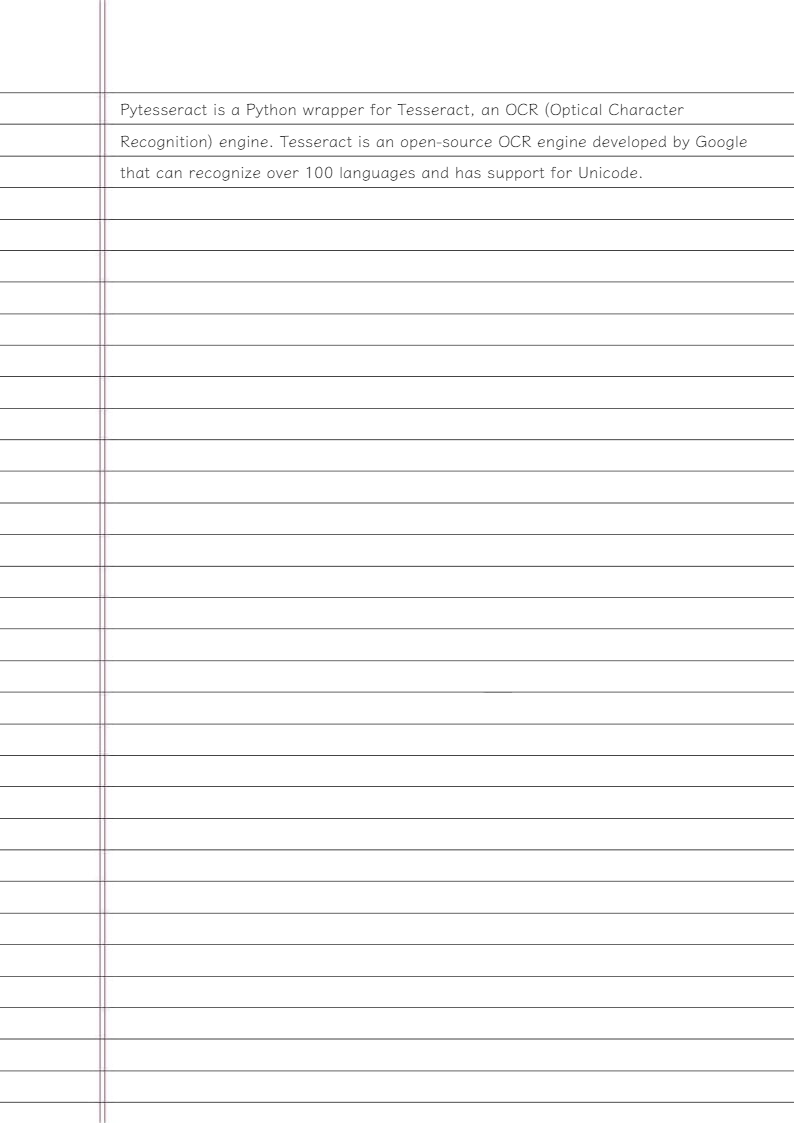

In [ ]:
from PIL import Image
im = Image.open(r"/content/drive/MyDrive/NLP/Handwritten Answers/image_1.jpg")
im.show()
im = Image.open(r"/content/drive/MyDrive/NLP/Handwritten Answers/image_2.jpg")
im.show()
im = Image.open(r"/content/drive/MyDrive/NLP/Handwritten Answers/image_3.jpg")
im.show()
